# La Guajira wind energy analysis

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Load datasets and inspect first rows
wind_speed = pd.read_csv("./datasets/windGuajira2019.csv", skiprows= 3)
air_density = pd.read_csv("./datasets/airDensityGuajira2019.csv", skiprows= 3)

In [22]:
# Inspect wind speed dataframe
print(wind_speed.head(), "\n\n")
print(wind_speed.info())

               time        local_time  electricity  wind_speed
0  2019-01-01 00:00  2018-12-31 19:00        0.952      13.742
1  2019-01-01 01:00  2018-12-31 20:00        0.953      13.783
2  2019-01-01 02:00  2018-12-31 21:00        0.946      13.515
3  2019-01-01 03:00  2018-12-31 22:00        0.940      13.327
4  2019-01-01 04:00  2018-12-31 23:00        0.941      13.341 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         8760 non-null   object 
 1   local_time   8760 non-null   object 
 2   electricity  8760 non-null   float64
 3   wind_speed   8760 non-null   float64
dtypes: float64(2), object(2)
memory usage: 273.9+ KB
None


In [23]:
# Inspect air density dataframe
print(air_density.head(), "\n\n")
print(air_density.info())

               time        local_time   rhoa
0  2019-01-01 00:00  2018-12-31 19:00  1.167
1  2019-01-01 01:00  2018-12-31 20:00  1.168
2  2019-01-01 02:00  2018-12-31 21:00  1.169
3  2019-01-01 03:00  2018-12-31 22:00  1.169
4  2019-01-01 04:00  2018-12-31 23:00  1.169 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        8760 non-null   object 
 1   local_time  8760 non-null   object 
 2   rhoa        8760 non-null   float64
dtypes: float64(1), object(2)
memory usage: 205.4+ KB
None


Both dataframes contain the pair of columns `time` and `local_time`, which containing datetime information currently stored as object type, need to be coerced into the appropriate data type. However, as these dataframes contain information for the same geographical area and for the same timespan, we can join them and dispense with repeated columns.

In [8]:
# Create a copy of the dataframe
wind_speed_copy = wind_speed.copy()

# Remove time and electricity columns
wind_speed_copy.drop(["time", "electricity"], axis = 1 ,inplace = True)

# Convert local_time to datetime data type
wind_speed_copy["local_time"] = pd.to_datetime(wind_speed_copy["local_time"])

# Set local_time column as index
wind_speed_copy.set_index("local_time", inplace= True)

# Rename wind_speed column
wind_speed_copy.rename(columns= {'wind_speed': 'wind_speed_m/s'}, inplace= True)

# Print first 5 rows
wind_speed_copy.head()

,wind_speed_m/s
local_time,
2018-12-31 19:00:00,13.742
2018-12-31 20:00:00,13.783
2018-12-31 21:00:00,13.515
2018-12-31 22:00:00,13.327
2018-12-31 23:00:00,13.341


In [9]:

# Create a copy of the dataframe
air_density_copy = air_density.copy()

# Remove time column
air_density_copy.drop("time", axis= 1, inplace= True)

# Convert local_time column to datetime data type
air_density_copy["local_time"] = pd.to_datetime(air_density_copy["local_time"])

# Set local_time as index
air_density_copy.set_index("local_time", inplace= True)

# Rename rhoa column to "air_density"
air_density_copy.rename(columns = {"rhoa": "air_density_kg/m3"}, inplace = True)

# Print first 5 rows
air_density_copy.head()

,air_density_kg/m3
local_time,
2018-12-31 19:00:00,1.167
2018-12-31 20:00:00,1.168
2018-12-31 21:00:00,1.169
2018-12-31 22:00:00,1.169
2018-12-31 23:00:00,1.169


In [10]:
# Inspect both new dataframes
print(wind_speed_copy.info(), "\n\n")
print(air_density_copy.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2018-12-31 19:00:00 to 2019-12-31 18:00:00
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wind_speed_m/s  8760 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB
None 


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2018-12-31 19:00:00 to 2019-12-31 18:00:00
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   air_density_kg/m3  8760 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB
None


In [19]:
# Null values in both datasets
print((
    wind_speed_copy
    .isnull()
    .sum()
), '\n')

print((
    air_density_copy
    .isnull()
    .sum()
))

wind_speed_m/s    0
dtype: int64 

air_density_kg/m3    0
dtype: int64


In [28]:
# Time frame of both dataframes
print("Wind speed data:" ,(
    np.min(wind_speed_copy.index),
    np.max(wind_speed_copy.index)
), "\n")

print("Air density data:" ,(
    np.min(air_density_copy.index),
    np.max(air_density_copy.index)
))

Wind speed data: (Timestamp('2018-12-31 19:00:00'), Timestamp('2019-12-31 18:00:00')) 

Air density data: (Timestamp('2018-12-31 19:00:00'), Timestamp('2019-12-31 18:00:00'))


In [42]:
# Check frequency in both dataframes
print(
    f"""
        Wind speed data frequency: {pd.infer_freq(wind_speed_copy.index)} \n
        Air density data frequency: {pd.infer_freq(air_density_copy.index)} \n
    """
)



        Wind speed data frequency: H 

        Air density data frequency: H 

    


After making sure both dataframes cover the same time span and have the same frequency, it is safe to join these into a single dataframe.

In [45]:
# Join dataframes
wind_df = wind_speed_copy.join(air_density_copy)
wind_df.head()

,wind_speed_m/s,air_density_kg/m3
local_time,,
2018-12-31 19:00:00,13.742,1.167
2018-12-31 20:00:00,13.783,1.168
2018-12-31 21:00:00,13.515,1.169
2018-12-31 22:00:00,13.327,1.169
2018-12-31 23:00:00,13.341,1.169


In [96]:
wind_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2018-12-31 19:00:00 to 2019-12-31 18:00:00
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   wind_speed_m/s     8760 non-null   float64
 1   air_density_kg/m3  8760 non-null   float64
dtypes: float64(2)
memory usage: 205.3 KB


Dataset spread measures:

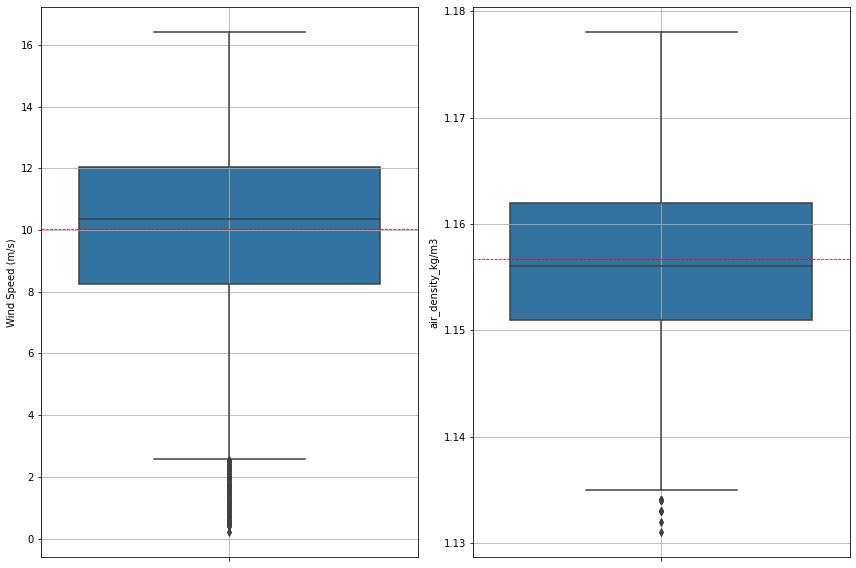

In [66]:
fix, ax = plt.subplots(1, 2, figsize= (12,8))

sns.boxplot(y= wind_df['wind_speed_m/s'], ax= ax[0])
ax[0].axhline(y=wind_df["wind_speed_m/s"].mean(),
              linewidth=0.8, 
              color="r", 
              linestyle="dashed")
ax[0].set_ylabel("Wind Speed (m/s)")
ax[0].grid(linewidth=0.8)

sns.boxplot(y= wind_df['air_density_kg/m3'], ax= ax[1])
ax[1].axhline(y= wind_df['air_density_kg/m3'].mean(),
              linewidth= 0.8,
              color= 'red',
              linestyle= 'dashed')
ax[1].grid(linewidth= 0.8)

plt.tight_layout()
plt.show()

In [123]:
pd.options.display.float_format = "{:,.2f}".format
wind_df.describe()

,wind_speed_m/s,air_density_kg/m3
count,"8,760.00","8,760.00"
mean,10.02,1.16
std,2.70,0.01
min,0.20,1.13
25%,8.25,1.15
50%,10.36,1.16
75%,12.05,1.16
max,16.40,1.18


In [94]:
print(f"\nVariance: \n\n{wind_df.var()}\n")

print(f"Correlation: {wind_df['wind_speed_m/s'].corr(wind_df['air_density_kg/m3'])} \n")


Variance: 

wind_speed_m/s      7.31
air_density_kg/m3   0.00
dtype: float64

Correlation: 0.23607921275863908 



  
Wind speed data is relatively widely spread, with values ranging from $0.20 \: m/s$ to $16.40 \: m/s$, including some observations considered outliers, which we will identify shortly. In contrast, the air density data shows a moderate spread, varying within approximately $0.05 \: kg/m^3$, with an average of $1.15 \: kg/.m^3$, value that will be used to calculate the power generated by the wind turbines.

In [121]:
# Outliers identification
q1 = wind_df.quantile(0.25)
q3 = wind_df.quantile(0.75)
iqr = q3 - q1
lwr = q1 - 1.5 * iqr

wind_speed_outliers = wind_df[wind_df['wind_speed_m/s'] < lwr[0]][['wind_speed_m/s']]
wind_speed_outliers

,wind_speed_m/s
local_time,
2019-09-08 14:00:00,2.07
2019-09-18 05:00:00,2.03
2019-09-18 06:00:00,1.57
2019-09-18 07:00:00,1.23
2019-09-18 08:00:00,0.81
...,...
2019-11-18 11:00:00,2.00
2019-11-18 12:00:00,2.25
2019-11-19 09:00:00,2.25


In [126]:
pd.options.display.float_format = "{:,.2f}".format
wind_speed_outliers.describe()

,wind_speed_m/s
count,97.00
mean,1.54
std,0.64
min,0.20
25%,0.98
50%,1.63
75%,2.07
max,2.55


In [141]:
# Find out date and time of the lowest wind speed observation
wind_speed_outliers[wind_speed_outliers['wind_speed_m/s'] == np.min(wind_speed_outliers['wind_speed_m/s'])]

,wind_speed_m/s
local_time,
2019-09-25 08:00:00,0.20


In [163]:
wind_df.loc['2019-09-25']

,wind_speed_m/s,air_density_kg/m3
local_time,,
2019-09-25 00:00:00,4.26,1.15
2019-09-25 01:00:00,3.94,1.15
2019-09-25 02:00:00,3.51,1.15
2019-09-25 03:00:00,3.07,1.15
2019-09-25 04:00:00,2.67,1.16
2019-09-25 05:00:00,2.10,1.16
2019-09-25 06:00:00,1.63,1.16
2019-09-25 07:00:00,0.90,1.16
2019-09-25 08:00:00,0.20,1.16


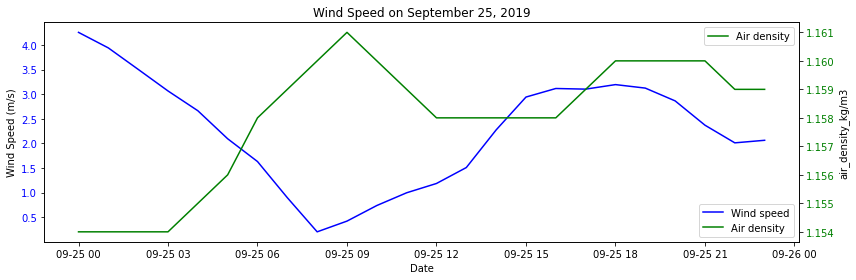

In [184]:
# PLot wind speed in the day of 

fig, ax1 = plt.subplots(figsize= (12,4))
line1=sns.lineplot(data= wind_df.loc['2019-09-25'],
             x = wind_df.loc['2019-09-25'].index,
             y = 'wind_speed_m/s', 
             color= 'blue', ax= ax1,
             label= 'Wind speed')
plt.title("Wind Speed on September 25, 2019")
plt.xlabel("Date")
plt.ylabel("Wind Speed (m/s)")
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
line2=sns.lineplot(data= wind_df.loc['2019-09-25'],
             x = wind_df.loc['2019-09-25'].index,
             y = 'air_density_kg/m3', 
             color= 'green', ax= ax2,
             label= 'Air density')
ax2.tick_params(axis='y', labelcolor='green')

lines = line1.get_lines() + line2.get_lines()
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower right')  # you can change loc to 'upper right' or 'lower center'

plt.tight_layout()
plt.show()

Examining these outliers, they are not likely to be severe anomalies given the nature of the data. Wind speed is a highly variable phenomenon, with readings that can change rapidly, reflecting natural fluctuations rather than errors. The lowest values, around 0.2 m/s, could correspond to very calm wind conditions. Conveniently, the air density readings at the same times show a behaviour that correlates to some extent. With this low wind speed and high air density happening in the morning, it can be inferred that conditions might have been dominated by a cold, stable, high-pressure air mass, resulting in high air density and very little wind movement.  

Now, considering these aparent outliers now considered as correct measurements under specific weather conditions, we can move on to the analysis of power generation from wind.

The power generated by wind turbines can be calculated with the formula:  

$$ 
P = \frac{1}{2} \times Air \: Density \times Rotor Swept Area \times Wind \: Speed^3 \times Efficiency
$$

Given an efficiency coefficient $ec = 0.4$, a rotor swept diameter $ \varnothing = 60m$, and the mean values from the `wind_df` we can calculate the electric power generated per wind turbine. 
To begin with, let's work out the rotor swept area from the known diameter value.

In [67]:
d = 60 # rotor swept diameter value

rs_area = np.pi * (d/2)**2

print(f"Rotor Swept Area = {rs_area} squared meters")

Rotor Swept Area = 2827.4333882308138 squared meters


...

In [125]:
air_density_mean = wind_df["air_density"].mean()
wind_speed_p50 = wind_df["wind_speed"].median()
ec = 0.4  # Efficiency coefficient

def power_gen(air_den, area, wind_s, eff_coef):
    """Work out wind turbines power generation capacity in MW"""
    return round((0.5* air_den * area * wind_s**3 * eff_coef) / 1e6, 3)

10.3605


In [126]:
mean_power_gen = power_gen(air_density_mean, rs_area, wind_speed_p50, ec)

print(f"Estimated mean power generation capacity: {mean_power_gen} MW")

Estimated mean power generation capacity: 0.727 MW


In [127]:
# Repeating the process with the 25th and 75th percentiles of wind speed.
wind_speed_p25 = np.quantile(wind_df["wind_speed"], 0.25)
wind_speed_p75 = np.quantile(wind_df["wind_speed"], 0.75)

power_gen_p25 = power_gen(air_density_mean, rs_area, wind_speed_p25, ec)
power_gen_p75 = power_gen(air_density_mean, rs_area, wind_speed_p75, ec)

print(f"25th percentile estimated power generation capacity: {power_gen_p25} MW")
print(f"75th percentile estimated mean power generation capacity: {power_gen_p75} MW")

25th percentile estimated power generation capacity: 0.368 MW
75th percentile estimated mean power generation capacity: 1.145 MW


...

In [131]:
wind_df_copy = wind_df.copy()

wind_df_copy["power_gen"] = round((0.5 * wind_df_copy["air_density"] * rs_area * wind_df_copy["wind_speed"]**3 * ec) / 1000000, 3)

wind_df_copy.head()

,wind_speed,air_density,power_gen
local_time,,,
2018-12-31 19:00:00,13.742,1.167,1.713
2018-12-31 20:00:00,13.783,1.168,1.729
2018-12-31 21:00:00,13.515,1.169,1.632
2018-12-31 22:00:00,13.327,1.169,1.565
2018-12-31 23:00:00,13.341,1.169,1.570


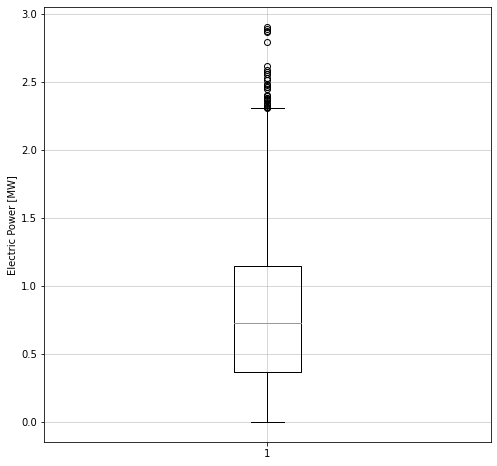

count    8760.000000
mean        0.794108
std         0.514372
min         0.000000
25%         0.368000
50%         0.729000
75%         1.144000
max         2.907000
Name: power_gen, dtype: float64


In [136]:
fig, ax = plt.subplots(figsize = (8,8))
ax.boxplot(wind_df_copy["power_gen"])
ax.set_ylabel("Electric Power [MW]")
ax.grid(linewidth=0.5)
plt.show()

print(wind_df_copy["power_gen"].describe())

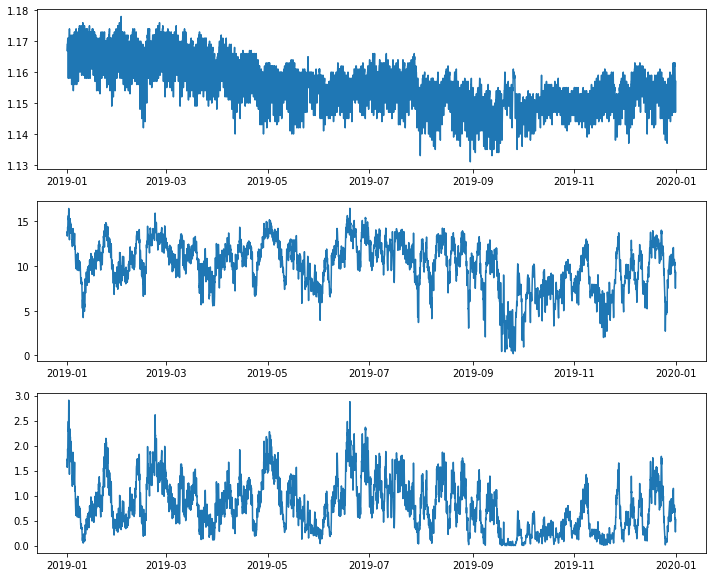

In [141]:
fig, ax = plt.subplots(3,1,figsize = (12,10))
ax[0].plot(wind_df_copy.index, wind_df_copy["air_density"])
ax[1].plot(wind_df_copy.index, wind_df_copy["wind_speed"])
ax[2].plot(wind_df_copy.index, wind_df_copy["power_gen"])
plt.show()